In [103]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
plt.close("all")

In [104]:
# Load data
### CHANGE PATH TO WHEREVER YOU SAVE THE WEIGHTS FILE ###
path=os.getcwd()
os.chdir(path)
weights = np.loadtxt("weights.txt") 

In [259]:
mean_weight = np.mean(weights)
# Function to compute empirical variance from a empirical
def compute_empirical_variance(x):
    m = np.mean(x)
    variance_weight = sum((x-m)**2)/(len(x))
    return variance_weight

In [276]:
# Compute approximate confidence interval, returns the lower and upper limit 
# of the interval l and u as a list [l,u]
def approximate_confidence_interval1(x):
    a = np.array(x)
    n = len(a)
    m = np.mean(a)
    b= (compute_empirical_variance(x))**(1/2)
    h = (1.96*b)/(n**(1/2))
    return m-h, m+h

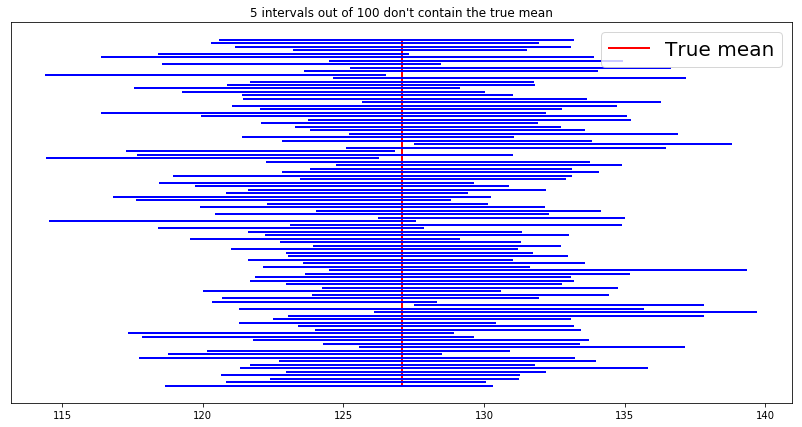

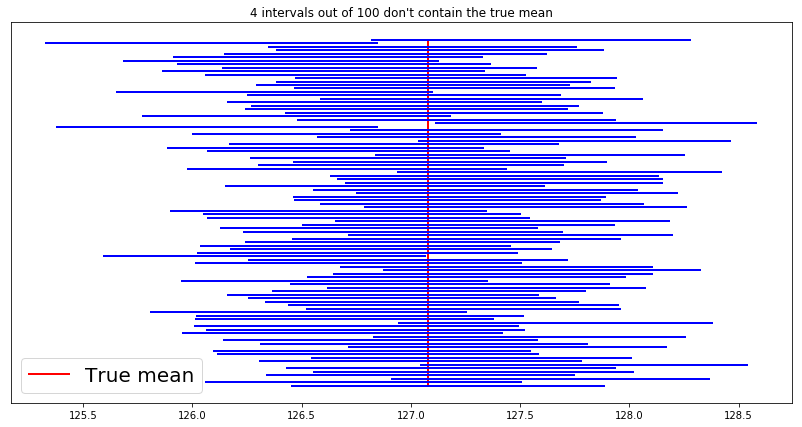

n =20
504 intervals out of 10000 don't contain the true mean
n =1000
457 intervals out of 10000 don't contain the true mean


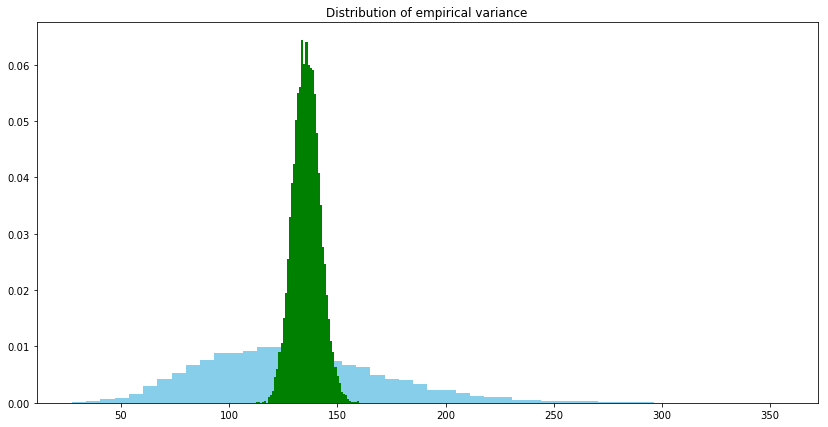

In [277]:
n_val = [20, 1000]
n_tries = 100
for n in n_val:
    conf_interval_list = []
    outside = 0
    for i in range(n_tries):
        # Uniform sampling with replacement
        random_ind = np.random.choice(weights.size, n, replace=True)
        conf_interval = approximate_confidence_interval(weights[random_ind])
        conf_interval_list.append(conf_interval)
        if conf_interval[0] > mean_weight or conf_interval[1] < mean_weight:
            outside += 1
    plt.figure(n, figsize=(14, 7))
    ax = plt.subplot(111)    
    ax.axes.get_yaxis().set_visible(False)    
    plt.plot(mean_weight, 0, color = 'red', lw=2, label='True mean') 
    plt.plot([mean_weight, mean_weight], [0, n_tries-1], color = 'red', lw=2) 
    for i in range(n_tries):
      plt.plot(conf_interval_list[i],[i, i] , color = 'blue', lw=2)
    plt.legend(fontsize=20)
    plt.title(str(outside) + " intervals out of 100 don't contain the true mean")
plt.show()
    
n_tries = 10000
for n in n_val:
    outside = 0
    for i in range(n_tries):
        # Uniform sampling with replacement
        random_ind = np.random.choice(weights.size, n, replace=True)
        conf_interval = approximate_confidence_interval(weights[random_ind])
        if conf_interval[0] > mean_weight or conf_interval[1] < mean_weight:
            outside += 1
    print( 'n =' + str(n))
    print(str(outside) + " intervals out of 10000 don't contain the true mean")
    
# Print distribution of empirical variance for n = 20 and n = 1000
empirical_var_list = []
for i_n in range(len(n_val)):
    n = n_val[i_n]
    empirical_var_list.append([])
    for i in range(n_tries):  
        random_ind = np.random.choice(weights.size, n, replace=True)
        empirical_var_list[i_n].append(compute_empirical_variance(weights[random_ind]))
plt.figure(n+1, figsize=(14, 7))
ax = plt.subplot(111)    
plt.title("Distribution of empirical variance")
plt.hist(empirical_var_list[0],50,normed=True,edgecolor = "none", color="skyblue", 
         label="n = 20")
plt.hist(empirical_var_list[1],50,normed=True,edgecolor = "none", color="green", 
         label="n = 1000")
plt.show()

The reuslts are similar to the prediction, whichis about 0.5 percent unsure that the mean is in the interval.